# Time Series Analysis with Deep Learning

In [3]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Alcohol Sales Data

In [15]:
df = pd.read_csv("datasets/Alcohol_Sales.csv",index_col = 0, parse_dates = True)
df.index.freq = "MS"
df.columns = ["Sales"]

In [16]:
df.shape

(325, 1)

In [17]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


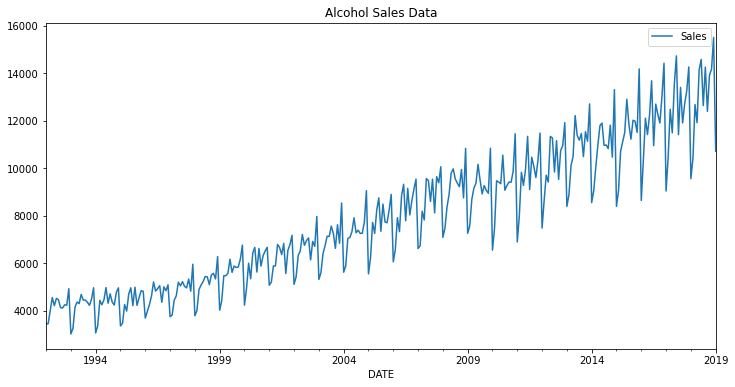

In [19]:
df.plot(figsize = (12,6), title = "Alcohol Sales Data");

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

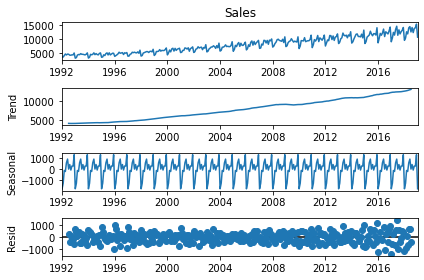

In [23]:
seasonal_decompose(df["Sales"]).plot();

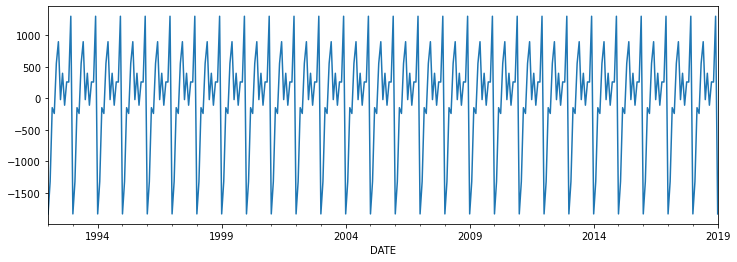

In [25]:
seasonal_decompose(df["Sales"]).seasonal.plot(figsize = (12,4));

In [29]:
train = df.iloc[:313]
test = df.iloc[313:]
len(test)

12

In [30]:
# Need to scale the data for NN
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Fit to the training set only, then transform the training and test set
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [35]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[0:10]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624]])

In [36]:
# Feed batches of the time series into the NN
from keras.preprocessing.sequence import TimeseriesGenerator

In [41]:
# Note enter scaled training data twice. N_input as 12 to represent seasonality
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [49]:
model = Sequential()
model.add(LSTM(150, activation = "relu", input_shape = (n_input, n_features)))
model.add(Dense (1))
model.compile(optimizer = 'adam', loss = "mse")
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit_generator(generator, epochs = 25)


Epoch 1/25
301/301 [==============================] - 2s 6ms/step - loss: 0.0164
Epoch 2/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0087
Epoch 3/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0080
Epoch 4/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0085
Epoch 5/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0088
Epoch 6/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0056
Epoch 7/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0043
Epoch 8/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0032
Epoch 9/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0026
Epoch 10/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0026
Epoch 11/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 12/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0019
Epoch 13/25
301/301 [===

In [52]:
model.history.history.keys()

dict_keys(['loss'])

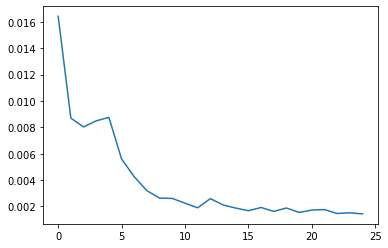

In [58]:
loss = model.history.history["loss"]
plt.plot(range(len(loss)),loss);

In [61]:
# Evaluate on the test data - create an evaluation batch of the last 12 points of the training set
first_eval = scaled_train[-12:].reshape(1,n_input,n_features)
model.predict(first_eval) # given the last 12 points of the training data this is the first point 
# of the test data

array([[0.6754912]], dtype=float32)

# Forecast with RNN Model

In [65]:
test_predictions = []

current_batch = scaled_train[-n_input:].reshape(1,n_input, n_features)
for i in range(len(scaled_test)):
    
    # predict based on the current batch
    current_pred = model.predict(current_batch)[0] # to format
    test_predictions.append(current_pred)
    
    # update current batch to include the prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [73]:
# transform the predictions back to original scale
true_predictions = scaler.inverse_transform(test_predictions)
test["Predictions"] = true_predictions

C:\Users\Imy Hull\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


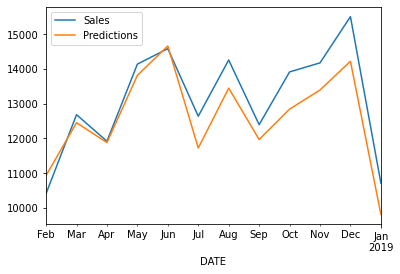

In [72]:
test.plot();

In [74]:
#model.save("FinalForecast.h5")

In [75]:
#from keras.models import load_model
#new_model = load_model("FinalForecast.h5")

# Miles Travelled Dataset

In [77]:
df = pd.read_csv("datasets/Miles_Traveled.csv",index_col = 0, parse_dates = True)
df.index.freq = "MS"
df.columns = ["Miles"]
df.head()

,Miles
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


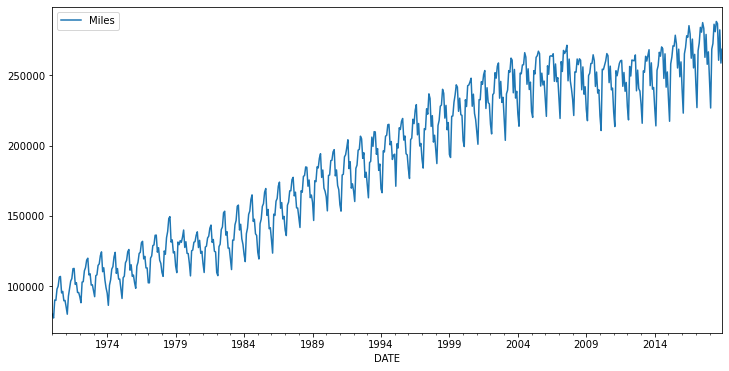

In [79]:
df.plot(figsize = (12,6));

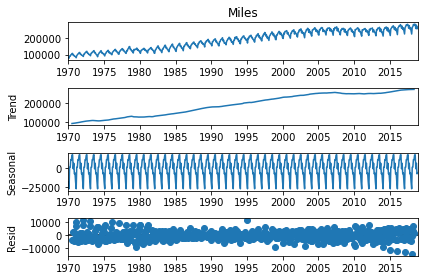

In [82]:
seasonal_decompose(df["Miles"]).plot();

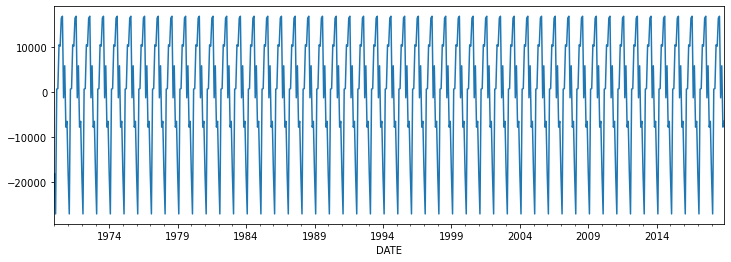

In [85]:
seasonal_decompose(df["Miles"]).seasonal.plot(figsize = (12,4));

Clear seasonal pattern in the data

In [86]:
df.shape

(588, 1)

In [88]:
train = df.iloc[:576]
test = df.iloc[576:]
len(test)

12

In [89]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[0:10]

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334]])

In [90]:
# Set parameters
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [91]:
# Build Model
model = Sequential()
model.add(LSTM(100, activation = "relu", input_shape = (n_input, n_features)))
model.add(Dense (1))
model.compile(optimizer = 'adam', loss = "mse")
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Fit model
model.fit_generator(generator, epochs = 50, verbose = 0)

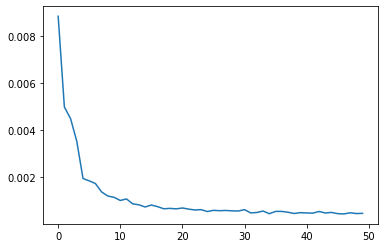

In [93]:
# Plot model results
loss = model.history.history["loss"]
plt.plot(range(len(loss)),loss);

In [94]:
# Get rolling predictions into the test set
test_predictions = []

current_batch = scaled_train[-n_input:].reshape(1,n_input, n_features)
for i in range(len(scaled_test)):
    
    # predict based on the current batch
    current_pred = model.predict(current_batch)[0] # to format
    test_predictions.append(current_pred)
    
    # update current batch to include the prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [95]:
# transform the predictions back to original scale
true_predictions = scaler.inverse_transform(test_predictions)
test["Predictions"] = true_predictions

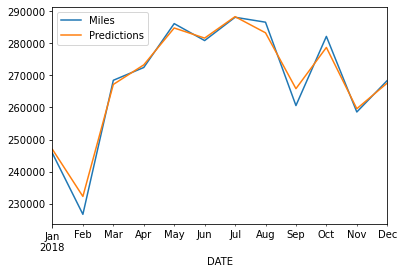

In [96]:
test.plot();

In [98]:
test

,Miles,Predictions
DATE,,
2018-01-01,245695.0,246916.240073
2018-02-01,226660.0,232243.251849
2018-03-01,268480.0,267184.305943
2018-04-01,272475.0,273288.459213
2018-05-01,286164.0,284799.348413
2018-06-01,280877.0,281645.794452
2018-07-01,288145.0,288339.757309
2018-08-01,286608.0,283301.672701
2018-09-01,260595.0,265866.026530
